In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sympy import *
import time as dt
from sklearn.linear_model import LinearRegression
import warnings
from IPython.display import Math,Latex
from pandas.errors import SettingWithCopyWarning
from statsmodels.api import *
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

init_printing(use_unicode=True,use_latex=True)
df=pd.read_excel('Данные Филлипс.xlsx',header=0,index_col=0)
df['Темп ЗП']=np.array([0]+[(df.iloc[i,1]-df.iloc[i-1,1])/df.iloc[i-1,1] for i in range(1,df.shape[0])])*100
df['1/Уровень безработиц, %'] = 1/df['Уровень безработиц, %']
df['1']=[1]*df.shape[0]

m = OLS(df[['Темп ЗП']].values,df[['1','1/Уровень безработиц, %']].values).fit()
display(m.summary())

c:\Users\ivant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                    0.1501
Date:                Sun, 20 Oct 2024   Prob (F-statistic):              0.703
Time:                        14:01:00   Log-Likelihood:                -41.570
No. Observations:                  19   AIC:                             87.14
Df Residuals:                      17   BIC:                             89.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5493      2.878      1.233      0.234      -2.523       9.622
x1             1.4766      3.811      0.387      0.703      -6.564       9.517
==============================================================================
Omnibus:                        0.625   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.732   Jarque-Bera (JB):                0.021
Skew:                           0.039   Prob(JB):                        0.989
Kurtosis:                       3.145   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
m.rsquared

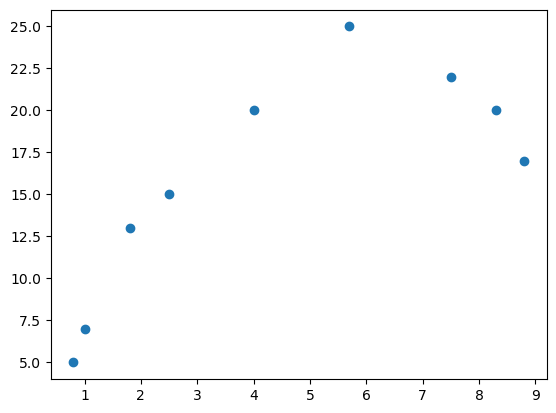

In [12]:
y=np.array([5,7,13,15,20,25,22,20,17]).reshape(1,-1)
x=np.array([0.8,1.0,1.8,2.5,4.0,5.7,7.5,8.3,8.8]).reshape(1,-1)
plt.scatter(x,y)

In [13]:
#x=np.concatenate([x.reshape(1,-1),np.ones(x.shape[0]).reshape((-1,1))],axis=0)

#m = OLS(y,x).fit()
#display(m.summary())

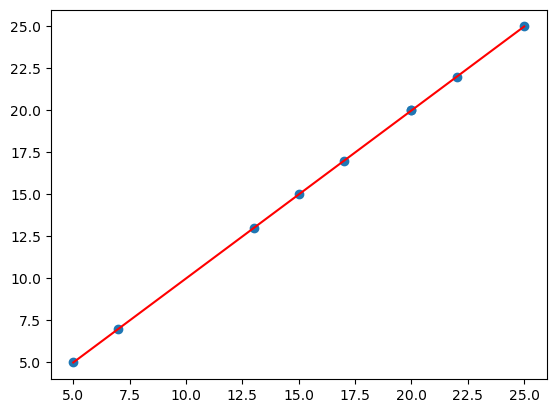

Degree = 1
Study time = 0.0 ms
Score = nan
Mean Squared Error = 0.0


c:\Users\ivant\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [14]:
from sklearn.metrics import mean_squared_error,r2_score
x=x.reshape(1,-1)
y=y
xp=x
deg=1
#pf = PolynomialFeatures(degree=deg)
#xp = #pf.fit_transform(xp)
        
binary = LinearRegression()
start_time = dt.time()
binary.fit(xp, y)
stop_time=dt.time()
plt.scatter(binary.predict(xp), y)
plt.plot([np.min(y),np.max(y)],[np.min(y),np.max(y)],color='red')
plt.show()
print(f'Degree = {deg}')
print(f'Study time = {(stop_time-start_time)*1000} ms')
print(f'Score = {r2_score(y,binary.predict(xp))}')
mse=(mean_squared_error(y,binary.predict(xp)))
print(f'Mean Squared Error = {mse}')

In [15]:
df=pd.read_excel('Двнные задачи 11.xlsx',header=0,names=['Q','K','L'])
for i in df.columns:
    df[f'ln{i}']=np.log(df[f'{i}'])
df['1']=[1]*df.shape[0]
m = OLS(df[['lnQ']],df[['1','lnK','lnL']]).fit()
m.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnQ   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     30.82
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           2.22e-06
Time:                        14:01:01   Log-Likelihood:                -1.2383
No. Observations:                  20   AIC:                             8.477
Df Residuals:                      17   BIC:                             11.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              9.7712      0.226     43.194      0.000       9.294      10.248
lnK            0.5252      0.093      5.656      0.000       0.329       0.721
lnL            0.6866      0.139      4.934      0.000       0.393       0.980
==============================================================================
Omnibus:                        0.283   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.868   Jarque-Bera (JB):                0.459
Skew:                          -0.141   Prob(JB):                        0.795
Kurtosis:                       2.314   Cond. No.                         9.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$
\Epsilon = \mathscr{f}'(x)\times \frac{x}{y}
$$
Коэффициент эластичности, где $x$ - средне значение поля в датасете

In [16]:
def q(k,l):
    z=(exp(m.params.iloc[0]), *m.params.iloc[1:3].values)
    return z[0]*k**z[1]*l**z[2]
q(8,3)

In [17]:
m.predict(df[['1','lnK','lnL']].values)

array([10.61117243, 11.15196738, 11.08707871, 11.62787367, 11.36546605,
       11.47711013, 11.906261  , 11.95301642, 12.23140375, 10.61117243,
       11.08707871, 11.15196738, 11.62787367, 11.36546605, 11.47711013,
       11.906261  , 11.95301642, 12.23140375, 11.62787367, 10.61117243])

In [18]:
from functools import reduce
#map(np.subtract(df[['lnQ']].values,m.predict(df[['1','lnK','lnL']].values).reshape(-1,1)))

In [19]:
np.subtract(df[['lnQ']].values,np.mean(df[['lnQ']].values)*len(df[['lnQ']].values))

array([[-218.32534851],
       [-218.07645246],
       [-218.52964897],
       [-217.48116107],
       [-217.28645545],
       [-217.30195964],
       [-217.1170373 ],
       [-216.73124496],
       [-217.16696447],
       [-218.70400236],
       [-217.89837719],
       [-217.89837719],
       [-217.47185868],
       [-217.64864005],
       [-217.84992481],
       [-217.07881609],
       [-216.7378895 ],
       [-217.03300655],
       [-217.67098735],
       [-218.16500586]])

In [20]:
'''model=m
if True:
    r2=model.rsquared
    params=model.params
    nobs=model.nobs
    df=model.df_model
    tvalues=model.tvalues
    pvalues=model.pvalues
    f_pvalue=model.f_pvalue
    fvalue=model.fvalue
    untrust=0.05
    t_crit = st.t.ppf(1 - 0.05/2, nobs - (df + 1))
t_crit'''

'model=m\nif True:\n    r2=model.rsquared\n    params=model.params\n    nobs=model.nobs\n    df=model.df_model\n    tvalues=model.tvalues\n    pvalues=model.pvalues\n    f_pvalue=model.f_pvalue\n    fvalue=model.fvalue\n    untrust=0.05\n    t_crit = st.t.ppf(1 - 0.05/2, nobs - (df + 1))\nt_crit'

In [26]:
np.set_printoptions(suppress=True)
########################################################################################################################################################################
#ДАННЫЕ
########################################################################################################################################################################
n_res=30
R = np.matrix([[1,0.3,0.6,0.4],[0.3,1,0.1,0.15],[0.6,0.1,1,0.8],[0.4,0.15,0.8,1]])
#S= np.matrix([[27],[45],[18]])
#E = np.matrix([[1000],[420],[41.5]])
########################################################################################################################################################################
#ПОДСЧЕТ ИСХОДЯ ИЗ ДАННЫХ
########################################################################################################################################################################
RX = R[1:,1:]
r= R[1:,0]
#1
b = (RX**-1)@r
beta = (RX**-1)@r
#b=np.multiply(b*S[0],1/S[1:])
#b_0=E[0]-np.sum(np.multiply(b[0:],E[1:]))
#b = np.matrix(np.vstack((np.array(b_0),np.array(b))))
#2
partial_corr_matrix=np.matrix([[ ((-R**-1)[i,j]/np.sqrt((R**-1)[i,i]*(R**-1)[j,j])) if i!=j else 1 for j in range((R**-1).shape[1])] for i in range((R**-1).shape[0])])
R_mnoj=np.sqrt(r.T@(RX**-1)@r)[0,0]
R_adj=np.sqrt(1-(1-R_mnoj**2)*(n_res-1)/(n_res-R.shape[0]))
#3
#elas=np.multiply(b[1:]/E[0],E[1:])
#compares=np.where(elas>beta[1:])
#4
fisher=np.array([[ partial_corr_matrix[i,j]**2*(n_res-E.shape[0])/((1-partial_corr_matrix[i,j]**2)*(E.shape[0]-1)) if i!=j else R_mnoj**2*(n_res-E.shape[0])/((1-R_mnoj**2)*(E.shape[0]-1)) for j in range((R).shape[1])] for i in range((R).shape[0])])[0,:].reshape(R.shape[0])
########################################################################################################################################################################
#ВЫВОД ИНФОРМАЦИИ
########################################################################################################################################################################
#display(Latex('$Построим~уравнение~регрессии~в~натуральном~масштабе:$'))
#y1 = '$y = '+''.join(['+' + str(b[i,0])+f'x_{i}' if str(b[i,0])[0]!='-' else str(b[i,0])+f'x_{i}' for i in range(len(b))])[1:].replace('x_0','')+'$'
#display(Latex(y1))
display(Latex('$Построим~уравнение~регрессии~в~стандартизированном~масштабе:$'))
y = '$y = '+''.join(['+' + str(beta[i,0])+f'x_{i+1}' if str(beta[i,0])[0]!='-' else str(beta[i,0])+f'x_{i}' for i in range(len(beta))])[1:]+'$'
display(Latex(y))
########################################################################################################################################################################
display(Latex('''
Формула для частной корреляции между переменными $X_i $ и $ X_j $ с учётом всех остальных переменных выглядит следующим образом:

$r_{ij \cdot other} = -\Omega_{ij}/\sqrt{\Omega_{ii} \Omega_{jj}}$

Где $ \Omega $ — это обратная корреляционная матрица.

По этой формуле посчитаем все частные корреляции:

'''))
for i in range(partial_corr_matrix.shape[0]):
    for j in range(i,partial_corr_matrix.shape[1]):
        if i!=j:
            if i==0:
                display(Math(('r_{Y'+f'X_{j}'+'}=') + latex(partial_corr_matrix[i,j])))
            else:
                display(Math(('r_{'+f'X_{i}'+f'X_{j}'+'}=') + latex(partial_corr_matrix[i,j])))
display(Latex(f'$Коэффициент~множественной~корреляции~равен:~~{R_mnoj}~$'))
display(Latex(f'$Скорректированный~Коэффициент~множественной~корреляции~равен:~~{R_adj}~$'))
########################################################################################################################################################################
#display(Latex('$№3$'))
#for i in range(elas.shape[0]):
    #display(Math(f'Частный~коэффициент~элатичности~при~X_{i+1}~=~'+ latex(elas[i,0])))
    #display(Latex(f'$Этот~коэффициент~{"больше" if compares[0] else "меньше"}~чем~коэффициент~'+'\\beta_{'+f'X_{i+1}'+'}~~~~~~~~~~$'))
########################################################################################################################################################################
for i in range(fisher.shape[0]):
    if i==0:
        display(Math(('F_{общий}=') + latex(fisher[i])))
    else:
        display(Math(('F_{'+f'X_{i}'+'}=') + latex(fisher[i])))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>